In [18]:
import importlib
import numpy as np

eda_dpp_utils = importlib.import_module('eda_dpp_utils')
rmu = importlib.import_module('regression_model_utils')
feu = importlib.import_module('feature_eng_utils')
aed = importlib.import_module('anomaly_and_event_detection_utils')
importlib.reload(eda_dpp_utils)
importlib.reload(rmu)
importlib.reload(feu)
importlib.reload(aed)

df, df_unnormalised, num_cols, df_unclean = eda_dpp_utils.preProcessing()
windows = [3, 6, 12, 24]
lags = [1]
targets = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Add MA, lag features
df = feu.addMovingAverages(df_unnormalised, windows, targets)
df = feu.addLagFeatures(df, lags, targets)
# Add current ground truths as features
for target in targets:
    df[f"{target}_current_gt"] = df[target]
# Adding cyclic features
df['hour'] = np.sin(np.pi * df['hour'] / 4) 
df['weekday'] = np.cos(np.pi * df['weekday'] / 8) 
df['month'] = np.cos(np.pi * df['month'] / 6) 

Training RMSE for CO(GT) = 0.058


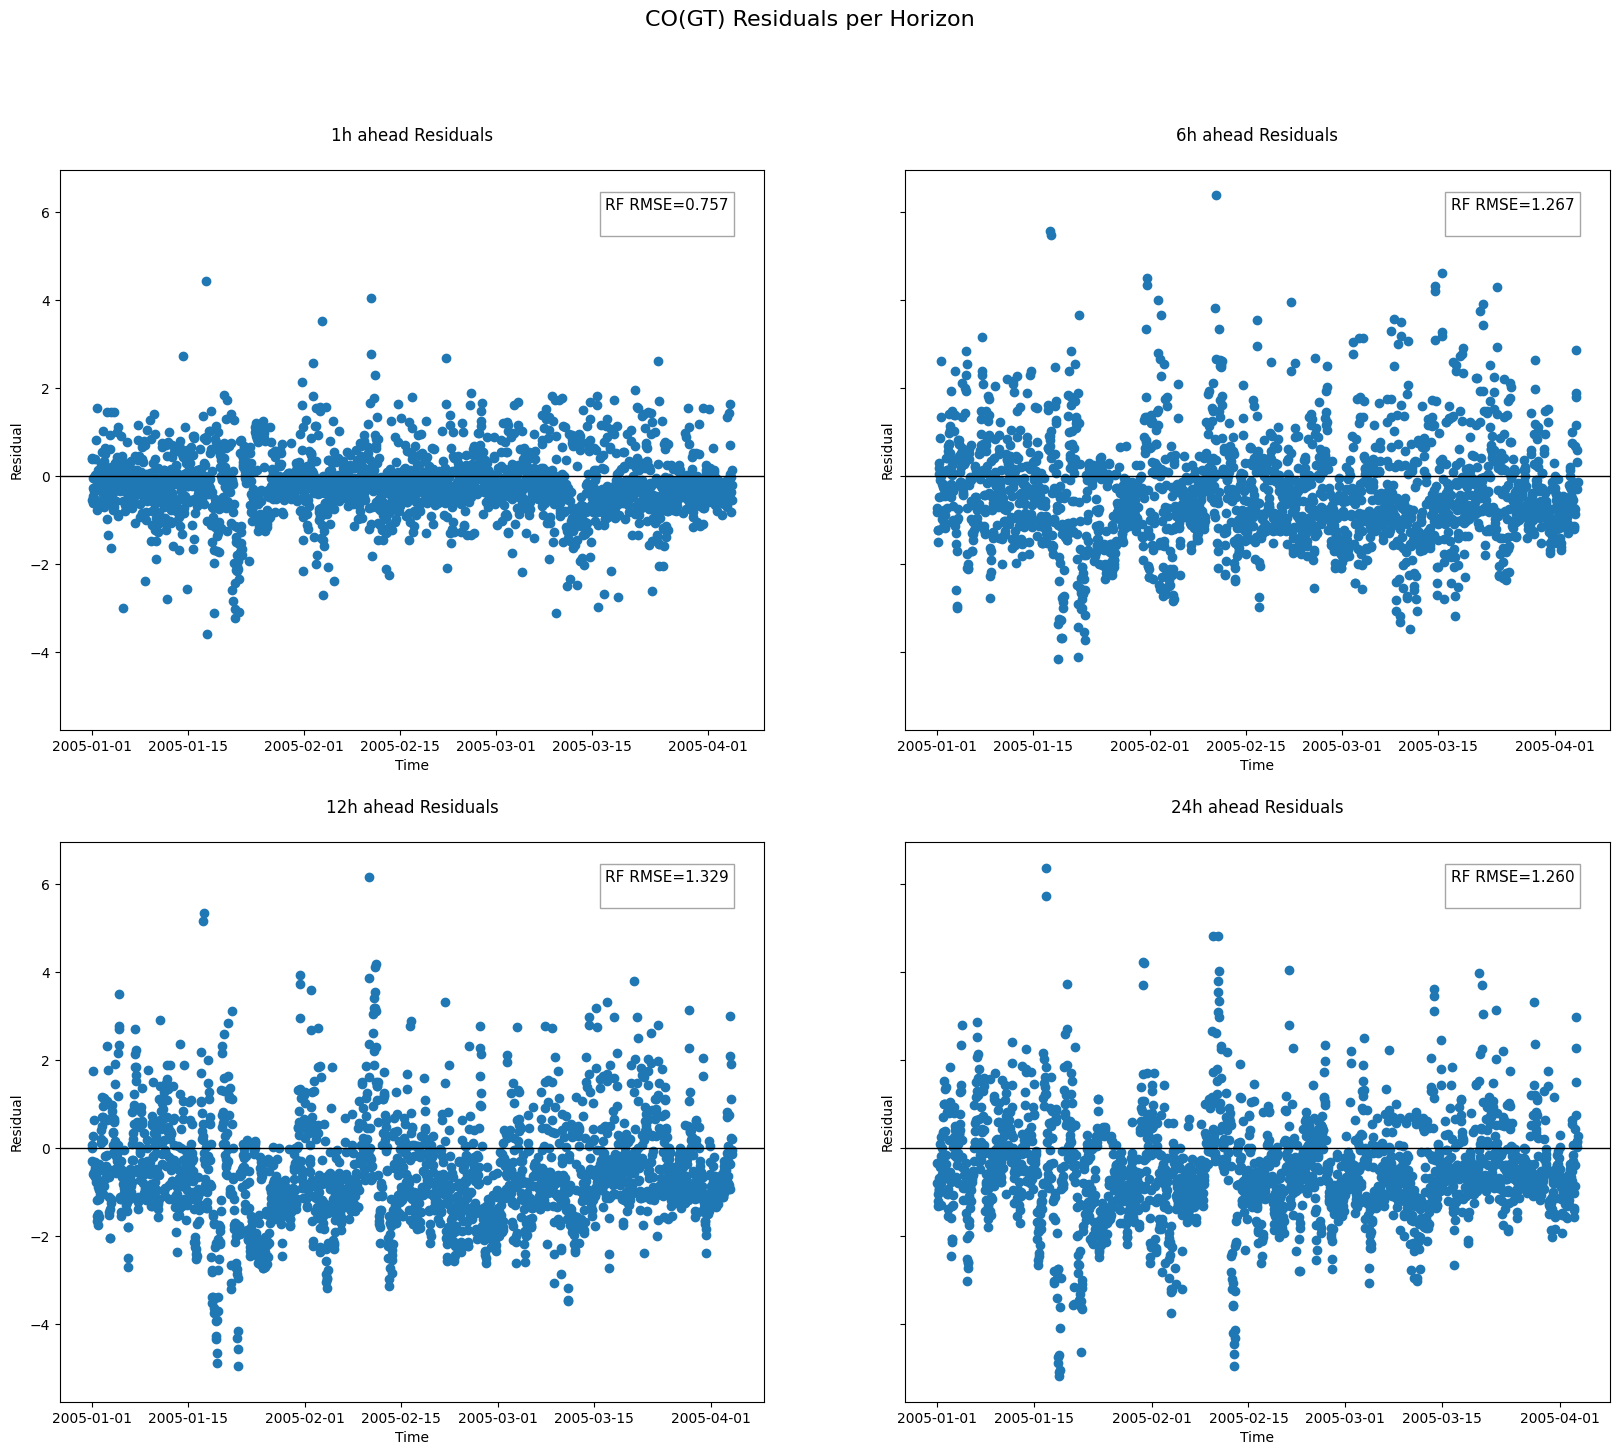

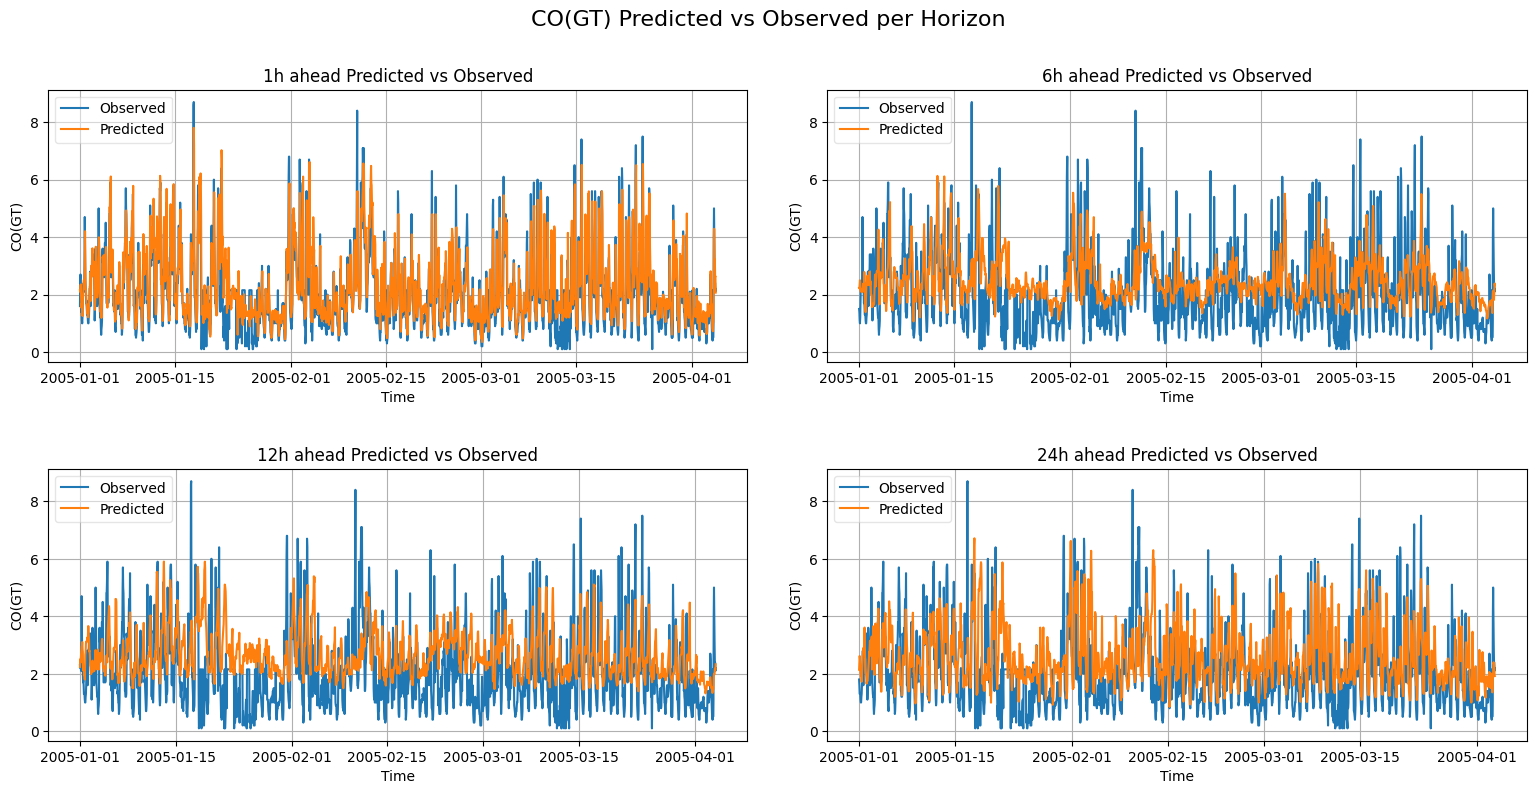

In [19]:
results = rmu.train_forecast_random_forest(df, targets[0], targets)

Training RMSE for NMHC(GT) = 12.012


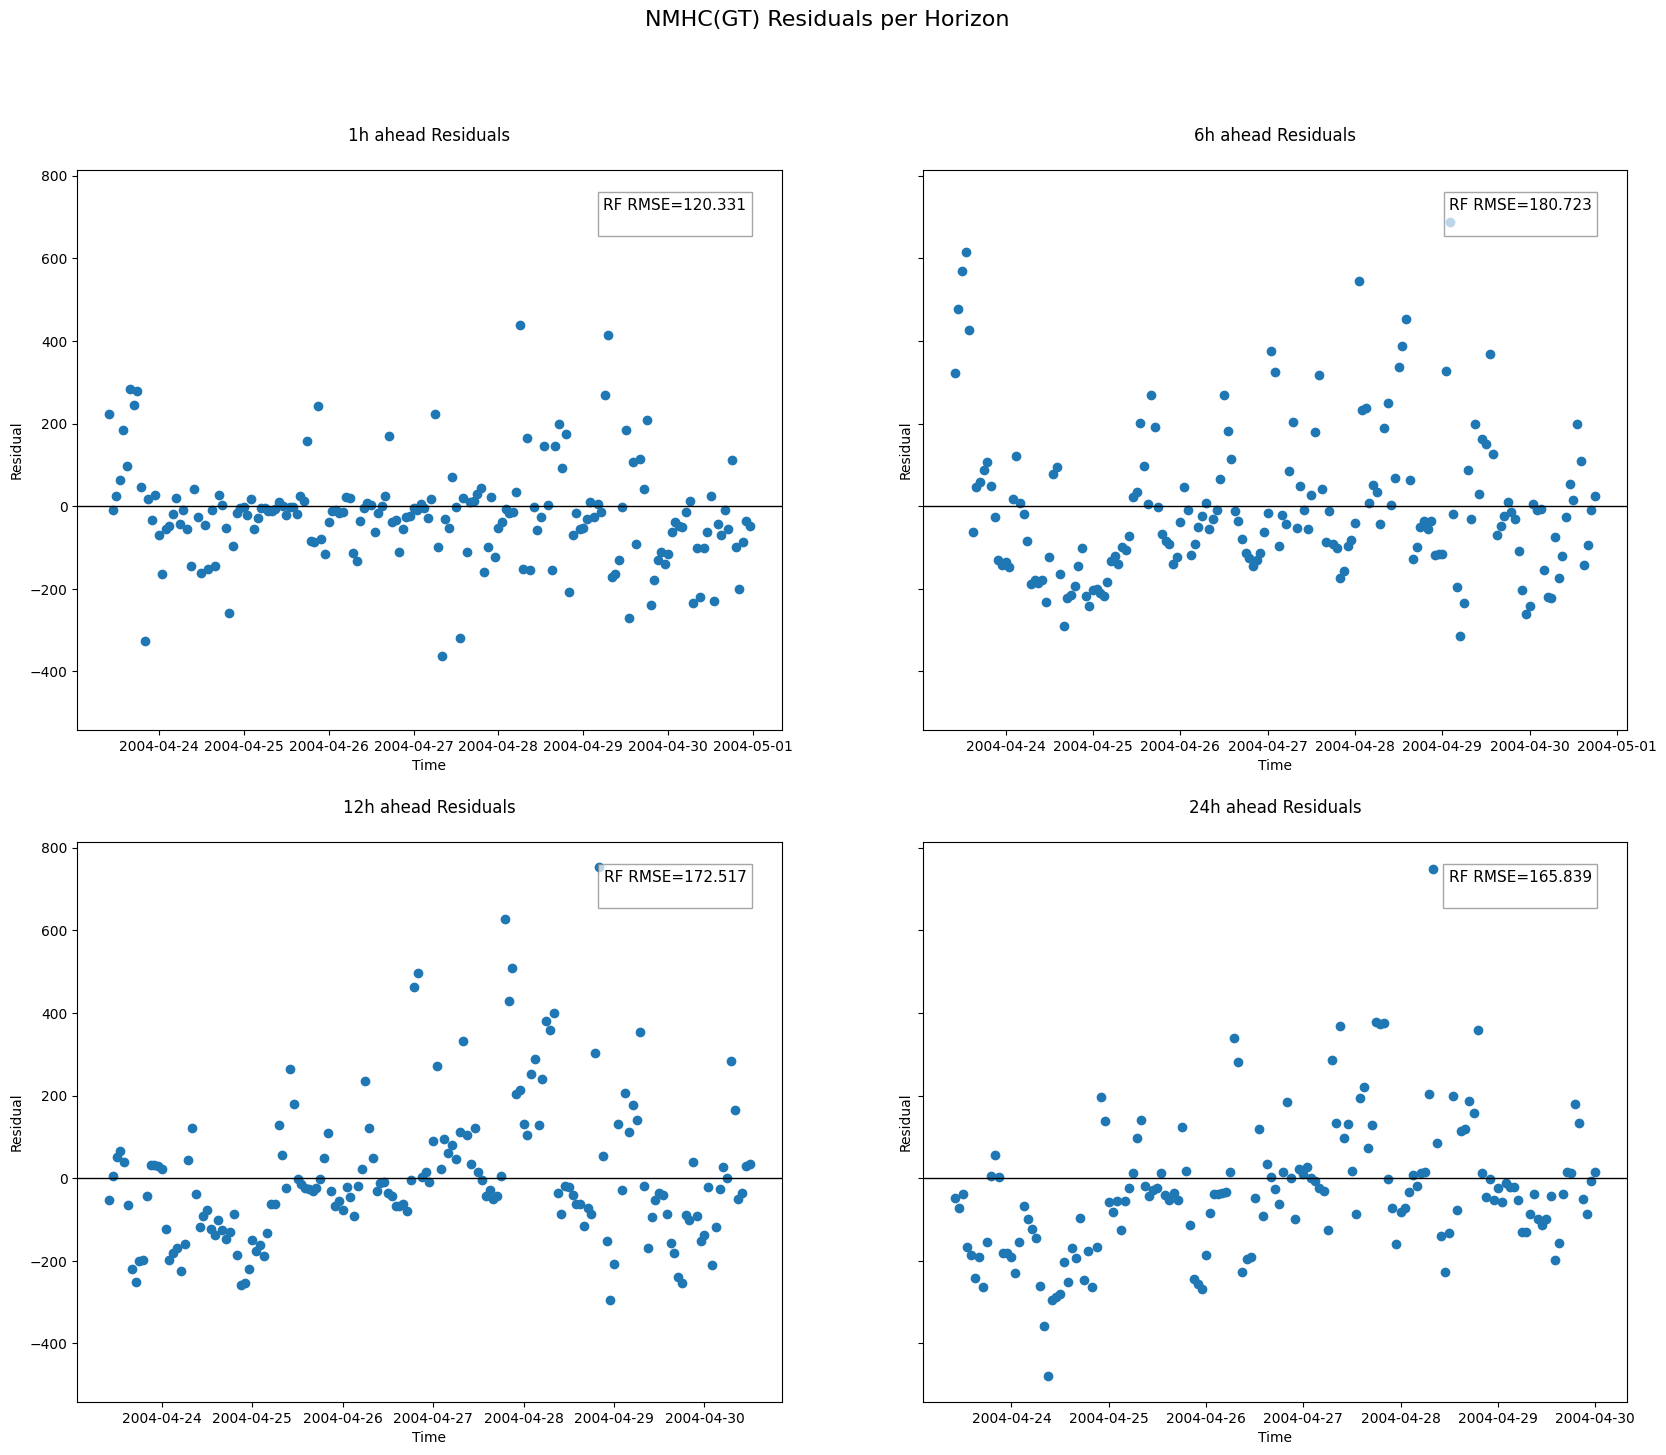

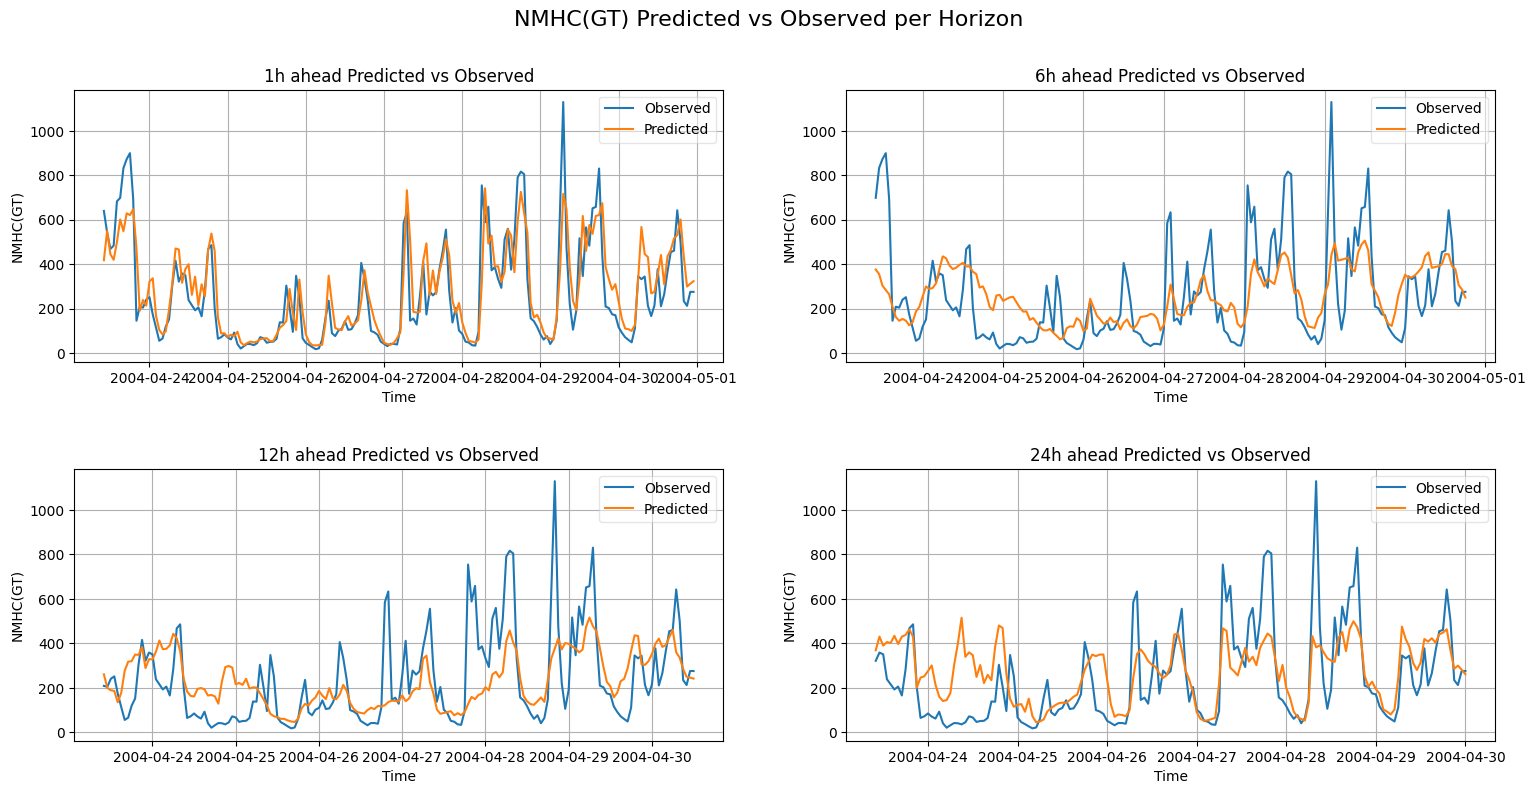

In [20]:
results = rmu.train_forecast_random_forest(df, targets[1], targets)

Training RMSE for C6H6(GT) = 0.199


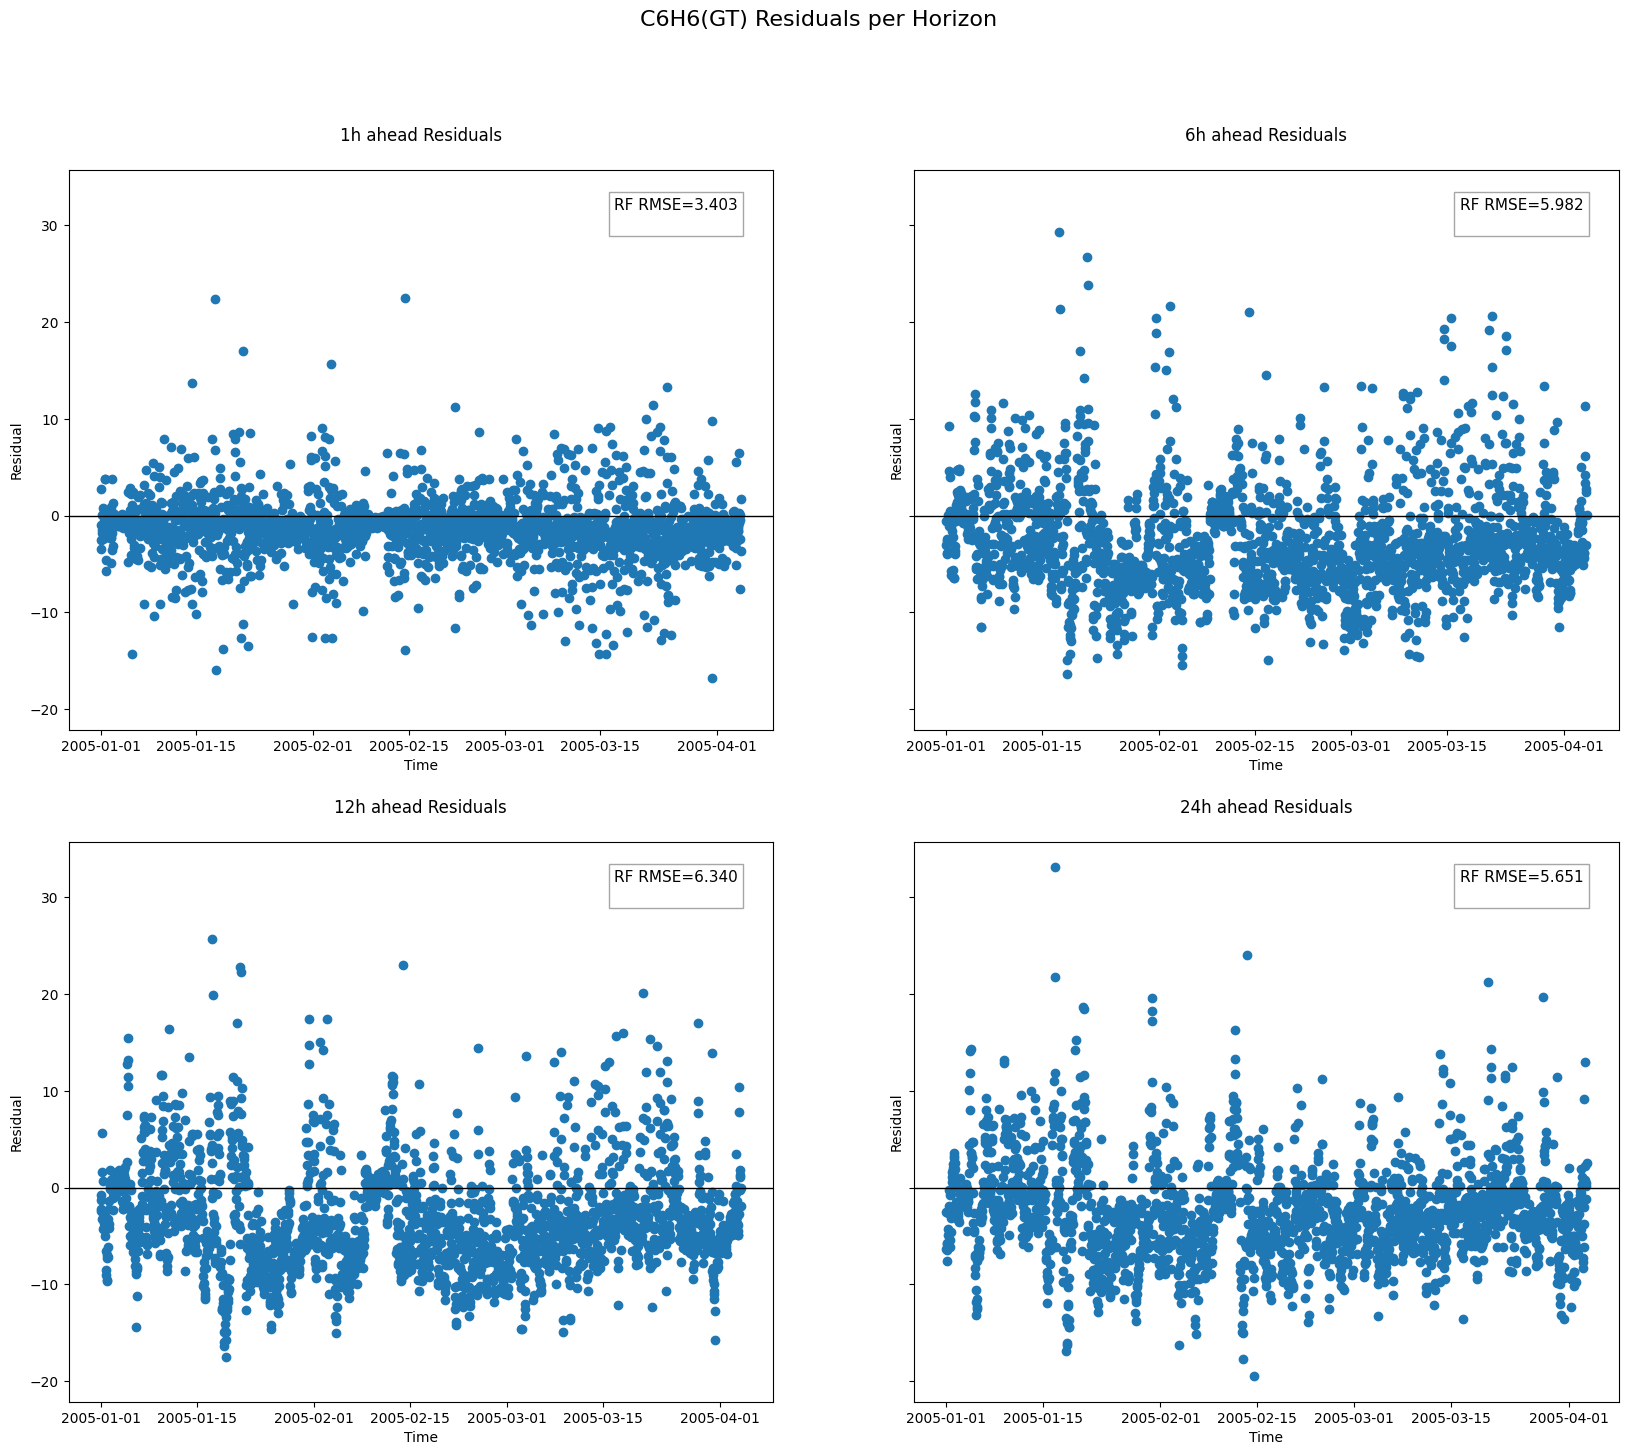

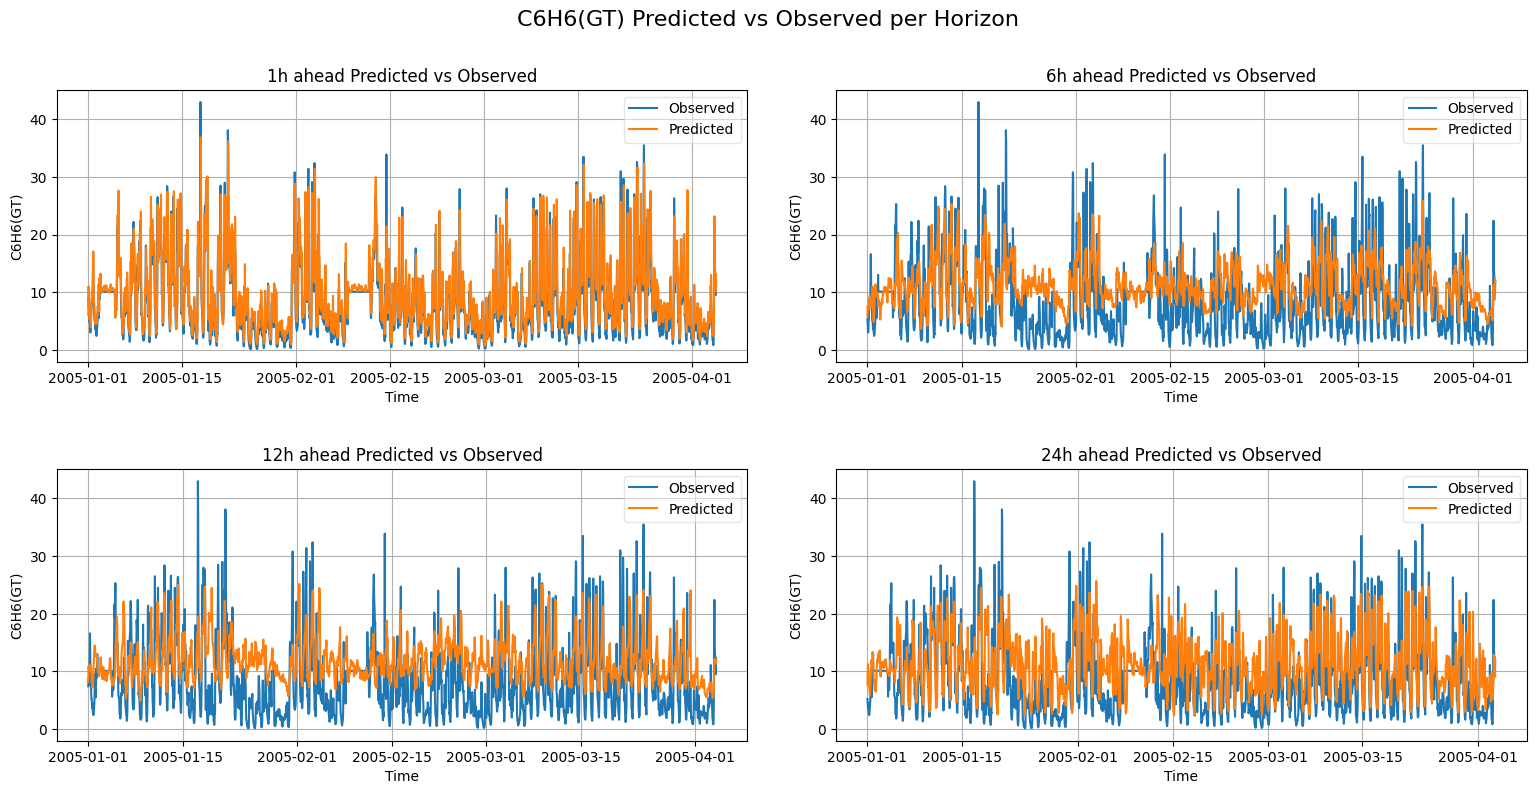

In [22]:
results = rmu.train_forecast_random_forest(df, targets[2], targets)

Training RMSE for NOx(GT) = 7.570


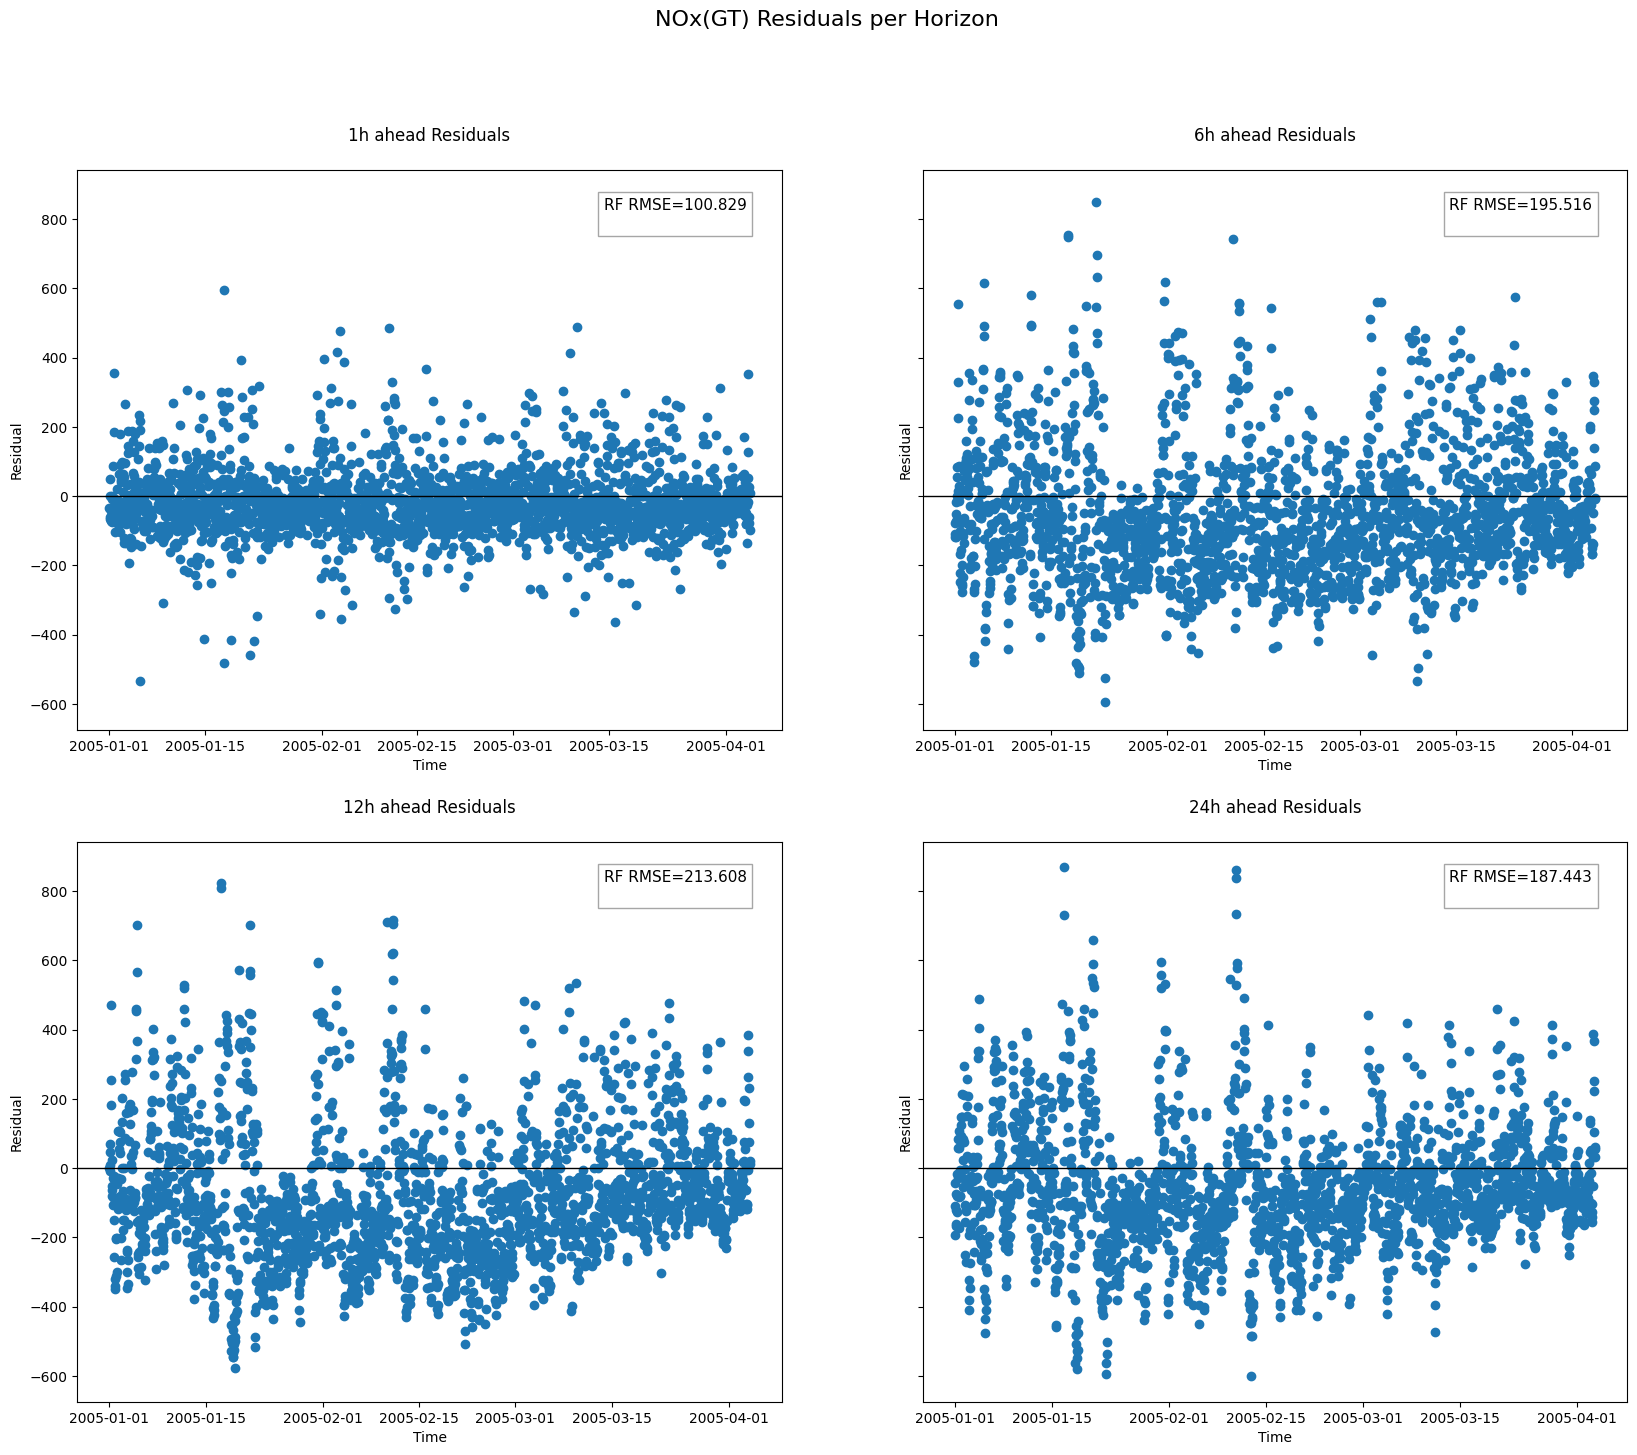

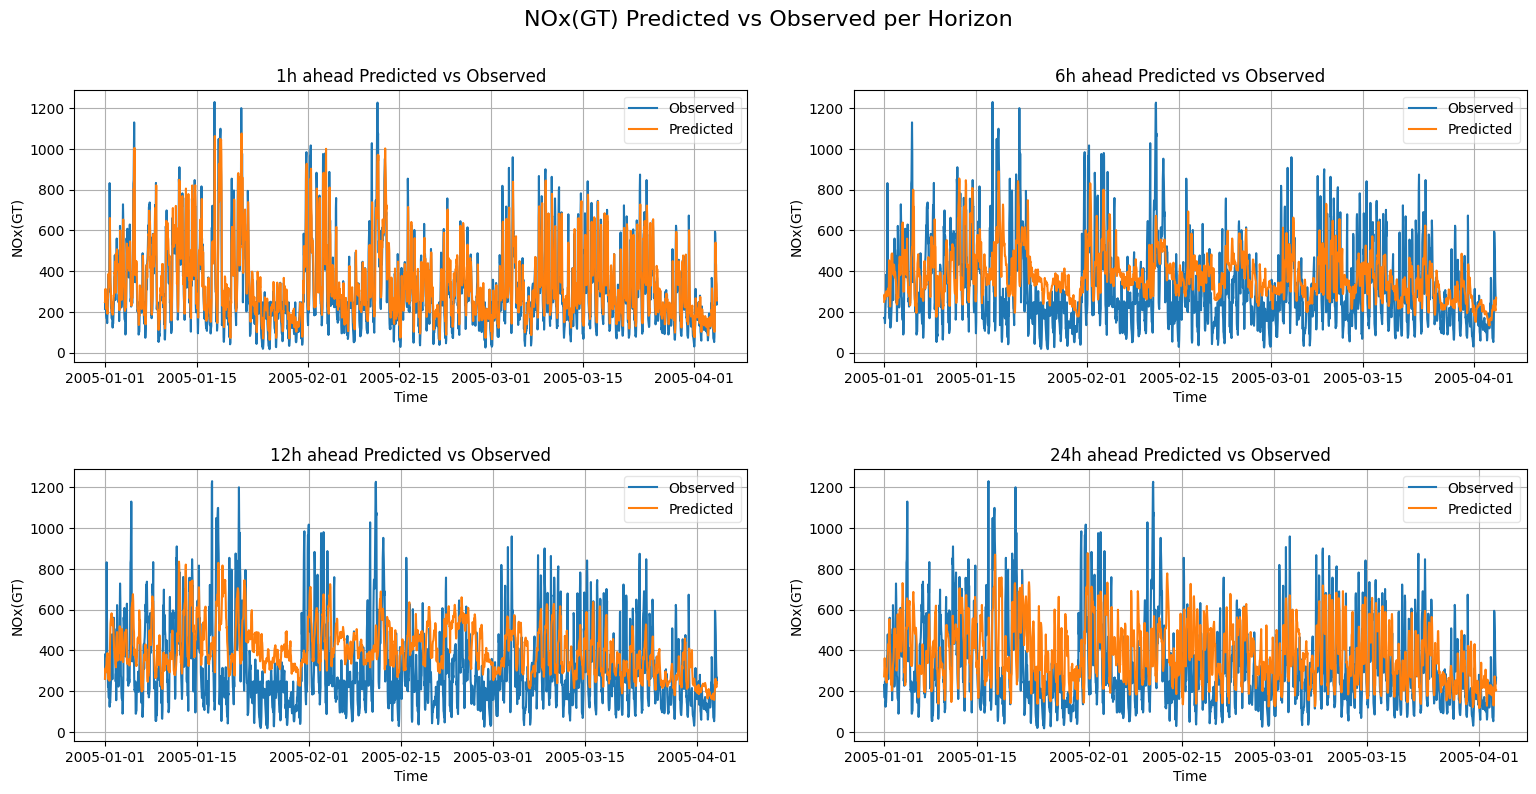

In [23]:
results = rmu.train_forecast_random_forest(df, targets[3], targets)

Training RMSE for NO2(GT) = 1.714


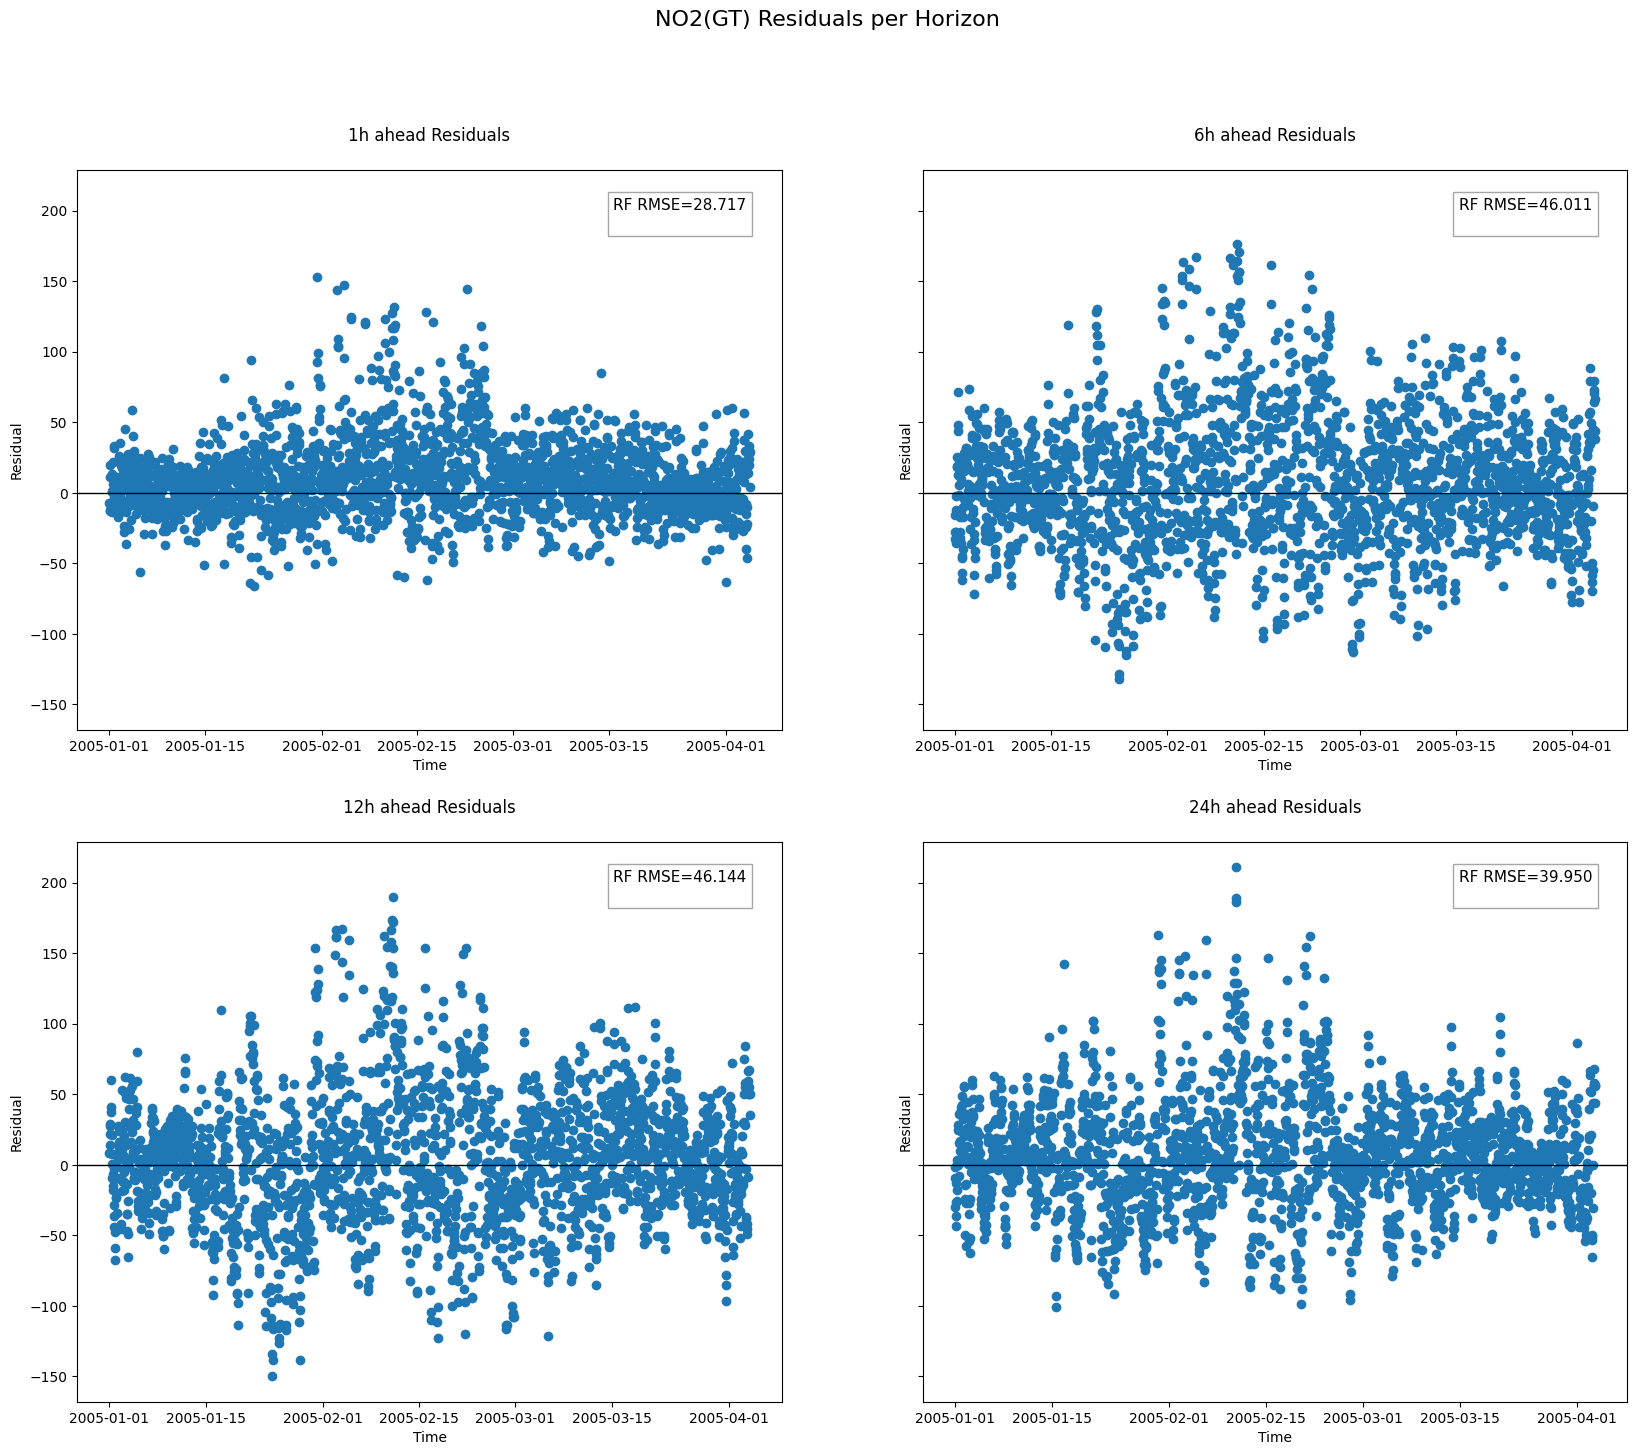

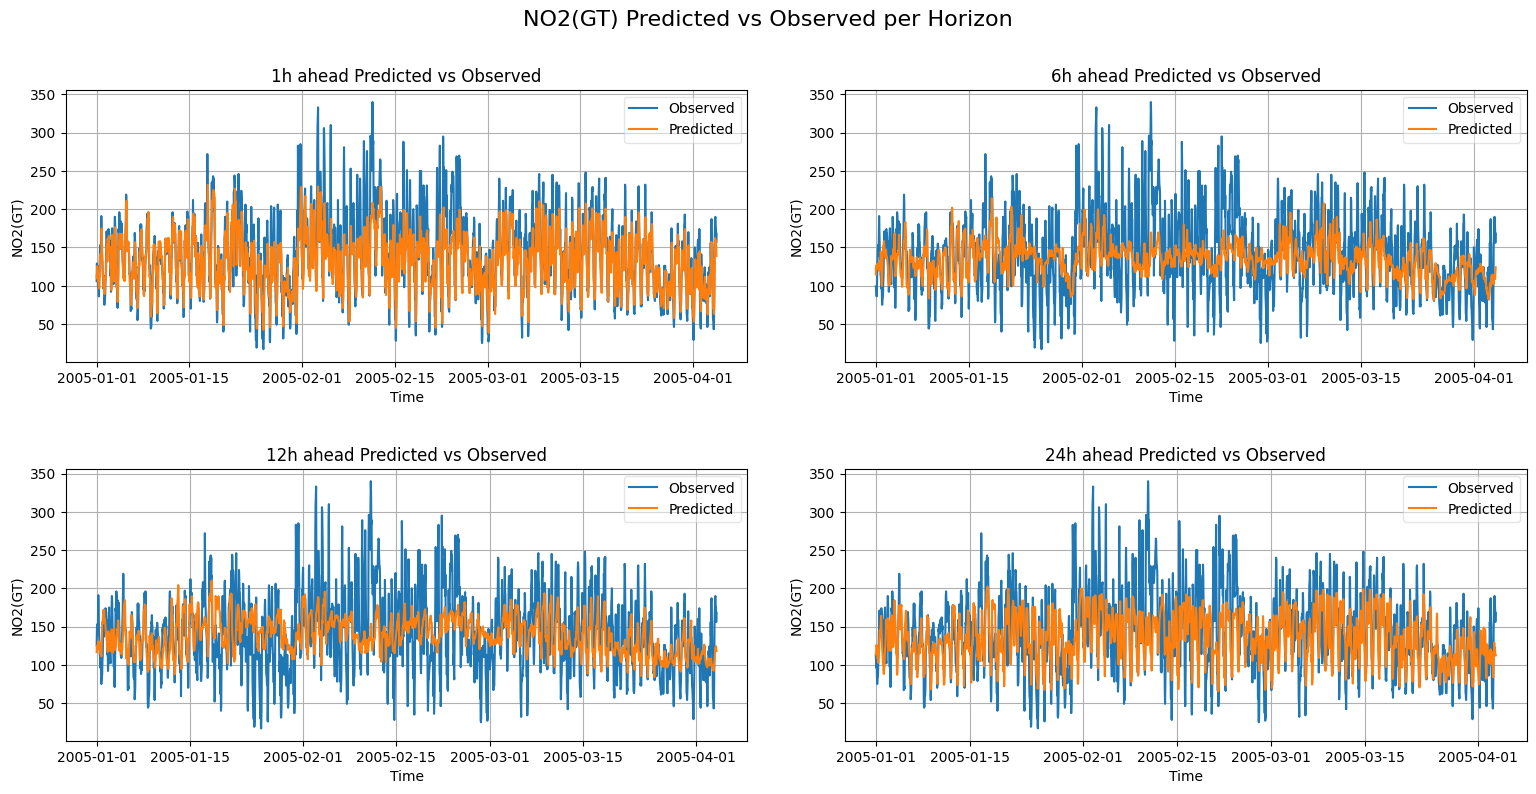

In [24]:
results = rmu.train_forecast_random_forest(df, targets[4], targets)